In [2]:
# Read Dataframe Salary_Data.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Dataset/Salary_Data.csv')

In [5]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


 ##### Separate the input and output variables

In [6]:
x = df[['YearsExperience']]
y = df['Salary']

In [7]:
x.shape

(30, 1)

In [10]:
df.corr() # For any linear regression model, we need to check correlation. If its high, accuracy will be more

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


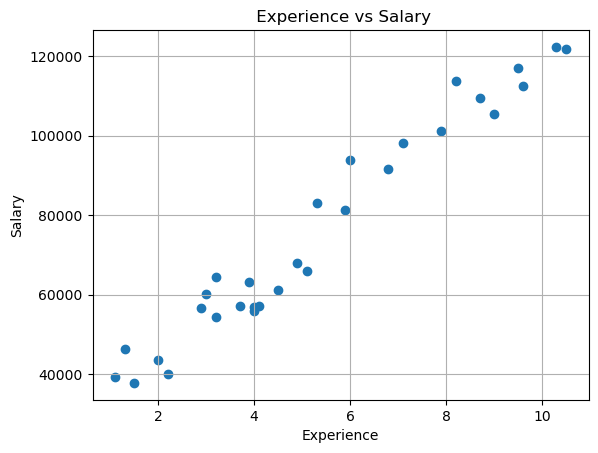

In [11]:
plt.grid()
plt.title(' Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y)

##### Cross Validation

In [12]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0) # Train Test Split by default divides the dataset into 75% for training and 25% for test
# random_state = 0 keeps the same values for testing. It does not change everytime the code is run. Note that the values are chosen randomly

In [38]:
x_test

,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7
27,9.6
11,4.0


In [18]:
x_train.size

22

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
regressor.coef_

array([9379.71049195])

In [25]:
regressor.intercept_

26986.691316737248

In [27]:
regressor.predict([[12]]) # Now algorithm is predicting salary based on user input

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

##### Predict on the test data

In [28]:
y_pred = regressor.predict(x_test)

In [29]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [30]:
y_test # Original test data

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
Name: Salary, dtype: float64

In [35]:
result = pd.DataFrame({
    'actual':y_test,
    'predicted': y_pred})

In [36]:
result

,actual,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


##### Performance Evaluation (Accuracy calculation of above algorithm)

In [48]:
# Mean Absolute Error
result = pd.DataFrame({
    'x':x_test['YearsExperience'],
    'y': y_test,
    'y^':y_pred,
    'Error':y_pred-y_test,
    'abs(error)':abs(y_pred-y_test)})

In [47]:
result

,x,y,y^,Error,abs(error)
2,1.5,37731.0,41056.257055,3325.257055,3325.257055
28,10.3,122391.0,123597.709384,1206.709384,1206.709384
13,4.1,57081.0,65443.504334,8362.504334,8362.504334
10,3.9,63218.0,63567.562235,349.562235,349.562235
26,9.5,116969.0,116093.940990,-875.059010,875.059010
24,8.7,109431.0,108590.172597,-840.827403,840.827403
27,9.6,112635.0,117031.912039,4396.912039,4396.912039
11,4.0,55794.0,64505.533285,8711.533285,8711.533285


In [44]:
# mean absolute error
np.mean(abs(y_pred-y_test)) # Output is in Rs

3508.5455930660555

In [45]:
from sklearn.metrics import mean_absolute_error # Calculating the same using function
mean_absolute_error(y_test,y_pred)

3508.5455930660555

In [53]:
# Root Mean Square Error
# Finding Square of error
result = pd.DataFrame({
    'x':x_test['YearsExperience'],
    'y': y_test,
    'y^':y_pred,
    'Error':y_pred-y_test,
    'Error2':(y_pred-y_test)**2})

In [50]:
result

,x,y,y^,Error,Error2
2,1.5,37731.0,41056.257055,3325.257055,1.105733e+07
28,10.3,122391.0,123597.709384,1206.709384,1.456148e+06
13,4.1,57081.0,65443.504334,8362.504334,6.993148e+07
10,3.9,63218.0,63567.562235,349.562235,1.221938e+05
26,9.5,116969.0,116093.940990,-875.059010,7.657283e+05
24,8.7,109431.0,108590.172597,-840.827403,7.069907e+05
27,9.6,112635.0,117031.912039,4396.912039,1.933284e+07
11,4.0,55794.0,64505.533285,8711.533285,7.589081e+07


In [52]:
#RMSE
np.sqrt(np.mean(np.mean((y_pred-y_test)**2)))

4733.70258289858

In [54]:
# Using functions, RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

4733.70258289858

In [55]:
# R-squared Error

In [56]:
mean_val = np.mean(y_test)

In [57]:
mean_val

84406.25

In [60]:
num = np.sum((y_test - mean_val)**2)-np.sum((y_test - y_pred)**2)
r2 = num/np.sum((y_test - mean_val)**2) # Value of R2

In [62]:
r2 # Shows 97.79% Accuracy of above algorithm

0.9779208335417601

In [64]:
from sklearn.metrics import r2_score # second method to calculate r2 score
r2_score(y_test, y_pred)

0.9779208335417602

In [66]:
regressor.score(x_test, y_test) # It calculates the predicted y by training algo and then displays R2 score of algo. Its a very compact function

0.9779208335417602

In [69]:
y_pred = regressor.predict(x) # Using complete data to predict output after fit
regressor.score(x, y) #R2 score of whole data

0.955975487542377

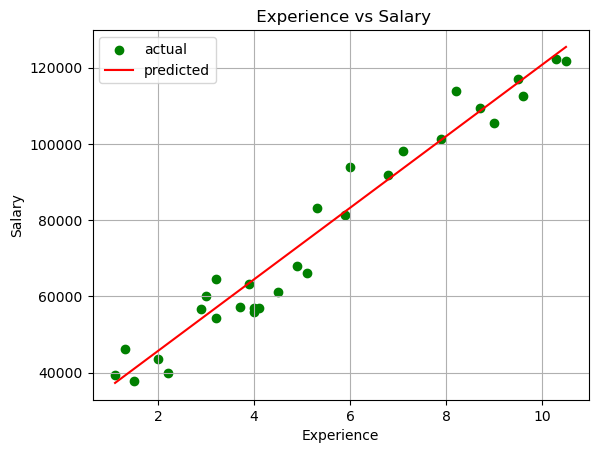

In [68]:
plt.grid()
plt.title(' Experience vs Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x,y, color ='green', label = 'actual')
plt.plot(x,y_pred, color = 'red', label ='predicted')
plt.legend()

In [71]:
# Mean Absolute Percentage Error
y_pred = regressor.predict(x_test)

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.05754512646779697

In [77]:
exp = float(input('Enter the experience: '))
exp = pd.DataFrame({'YearsExperience': [exp]})
sal = regressor.predict(exp)
print ('Your expected Salary can be:', sal[0])

Enter the experience:  6


Your expected Salary can be: 83264.95426841333
